# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make Dataset

In [3]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.1, random_state=42)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

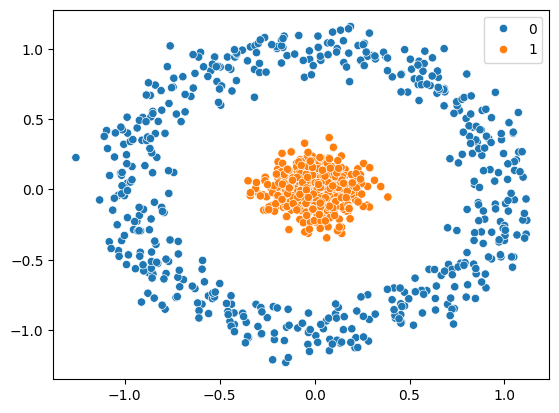

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

# Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adaboost Algorithm


```python

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

class sklearn.ensemble.AdaBoostClassifier(
  estimator=None, *,
  n_estimators=50,
  learning_rate=1.0,
  algorithm='deprecated',
  random_state=None
)



```

## Default Parameter

In [8]:
model1 = AdaBoostClassifier(random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9966666666666667

## Random parameter

In [22]:
model2 = AdaBoostClassifier(
  estimator = DecisionTreeClassifier(),
  n_estimators = 50,
  learning_rate = 0.5,

  random_state = 42
)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9966666666666667

# Grid Search CV

In [23]:
params = {
    'estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression()],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

In [26]:
%%time

grid_model1 = GridSearchCV(
    estimator = AdaBoostClassifier(random_state=42),
    param_grid = params,
    cv = 5,

    verbose = 1,
    n_jobs = -1
)


grid_model1.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 1.75 s, sys: 222 ms, total: 1.97 s
Wall time: 1min 55s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       LogisticRegression()],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=1)

In [27]:
grid_model1.best_params_

{'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.1,
 'n_estimators': 300}

In [28]:
grid_model1.best_score_

np.float64(0.9942857142857143)